# Imports

In [59]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

sns.set_style('darkgrid')
plt.style.use('ggplot')

## Load df_cleaned

In [60]:
path = '/home/edilson07/projects/rp_housing/notebooks/'

df = pd.read_csv(path + 'gtp_analysis.csv')

In [61]:
df.shape

(39860, 13)

In [62]:
df.head()

,nome,preco,quartos,garagem,area,banheiros,condominio,link,tipo,bairro,latitude,longitude,regiao
0,"Vendo apartamento MRV (rio amazonas 1º andar, ...",180000.00,2,1,50,1,205.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Centro,-20.81,-49.38,Centro
1,Apartamento para venda em Jardim Santa Lúcia d...,150000.00,2,1,56,1,220.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Jardim Santa Lúcia,-20.80,-49.40,Cidade das Crianças
2,Apartamento para venda em Centenário Da Emanci...,140000.00,2,1,52,2,0.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Centenário da Emancipação,-20.76,-49.38,CEU
3,Apartamento para venda em Jardim Yolanda de 48...,170000.00,2,1,48,1,240.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Jardim Yolanda,-20.80,-49.35,Represa
4,Apartamento para venda em Eldorado de 60.00m² ...,128000.00,2,1,60,1,0.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Eldorado,-20.79,-49.40,Cidade das Crianças


# df_cleaned Description

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39860 entries, 0 to 39859
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        39860 non-null  object 
 1   preco       39860 non-null  float64
 2   quartos     39860 non-null  int64  
 3   garagem     39860 non-null  int64  
 4   area        39860 non-null  int64  
 5   banheiros   39860 non-null  int64  
 6   condominio  39860 non-null  float64
 7   link        39860 non-null  object 
 8   tipo        39860 non-null  object 
 9   bairro      39860 non-null  object 
 10  latitude    39860 non-null  float64
 11  longitude   39860 non-null  float64
 12  regiao      39860 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 4.0+ MB


In [64]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [65]:
df.describe()

,preco,quartos,garagem,area,banheiros,condominio,latitude,longitude
count,39860.00,39860.00,39860.00,39860.00,39860.00,39860.00,39860.00,39860.00
mean,886400.61,2.82,2.47,201.52,2.86,205.86,-20.81,-49.37
std,990851.11,0.75,1.27,2359.17,1.43,250.49,0.03,0.03
min,15000.00,1.00,1.00,10.00,1.00,0.00,-20.90,-49.46
25%,290000.00,2.00,1.00,80.00,2.00,0.00,-20.83,-49.39
50%,500000.00,3.00,2.00,140.00,3.00,1.80,-20.81,-49.38
75%,1150000.00,3.00,4.00,225.00,4.00,380.00,-20.80,-49.35
max,17000000.00,5.00,5.00,276161.00,5.00,995.00,-20.71,-49.29


In [66]:
df['bairro'] = df['bairro'].apply(lambda x: x.strip())

## EDA

In [67]:
df.query("bairro == 'Santos Dumont' and tipo == 'apartamento'")

,nome,preco,quartos,garagem,area,banheiros,condominio,link,tipo,bairro,latitude,longitude,regiao
7206,Apartamento para venda em Alto Rio Preto Resid...,380000.00,2,1,57,2,0.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7214,Apartamento para venda em Santos Dumont de 82....,330000.00,2,2,82,1,0.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7250,"Apartamento com 2 dormitórios à venda, 57 m² p...",359000.00,2,1,58,2,360.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7251,"Apartamento com 2 dormitórios à venda, 57 m² p...",349000.00,2,1,58,2,360.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7259,"Apartamento com 2 dormitórios à venda, 57 m² p...",320000.00,2,1,57,2,400.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,Apartamento Cobertura em São José do Rio Preto,500000.00,2,1,57,2,280.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
15398,Apartamento Padrão em São José do Rio Preto,670000.00,3,3,145,4,863.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
15421,Apartamento Cobertura em São José do Rio Preto,500000.00,2,1,57,2,280.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
15445,Apartamento Cobertura em São José do Rio Preto,1300000.00,4,5,217,4,1.90,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro


In [ ]:
pd.set_option()

In [58]:
print(df.loc[df.index == 7214,:]['link'].values[0])

https://sp.olx.com.br/regiao-de-sao-jose-do-rio-preto/imoveis/apartamento-para-venda-em-santos-dumont-de-82-00m-com-2-quartos-1-suite-e-2-garagens-1239432735


## Target Variable(Price)

<Axes: xlabel='preco', ylabel='Count'>

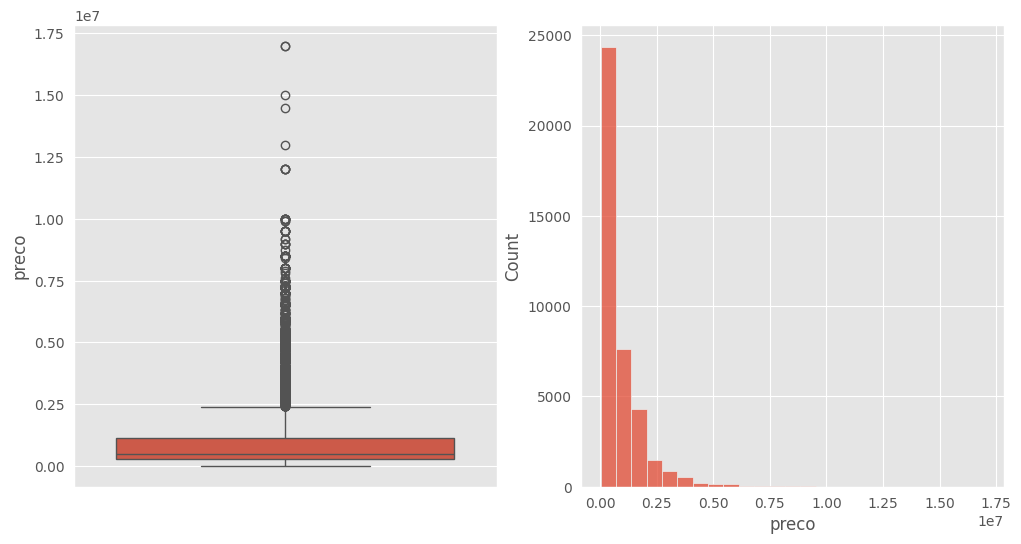

In [73]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df['preco'])

plt.subplot(1,2,2)
sns.histplot(df['preco'], bins=25)

In [102]:
# Calculando o IQR para a coluna 'preco'
Q1 = df['preco'].quantile(0.25)
Q3 = df['preco'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
lower_limit = Q1 - 1.0 * IQR
upper_limit = Q3 + 1.0 * IQR

# Filtrando o df_cleanedset para remover outliers
df_precoiqr = df[(df['preco'] >= lower_limit) & (df['preco'] <= upper_limit)]

## Box e hist após remoção de outliers

<Axes: xlabel='preco', ylabel='Count'>

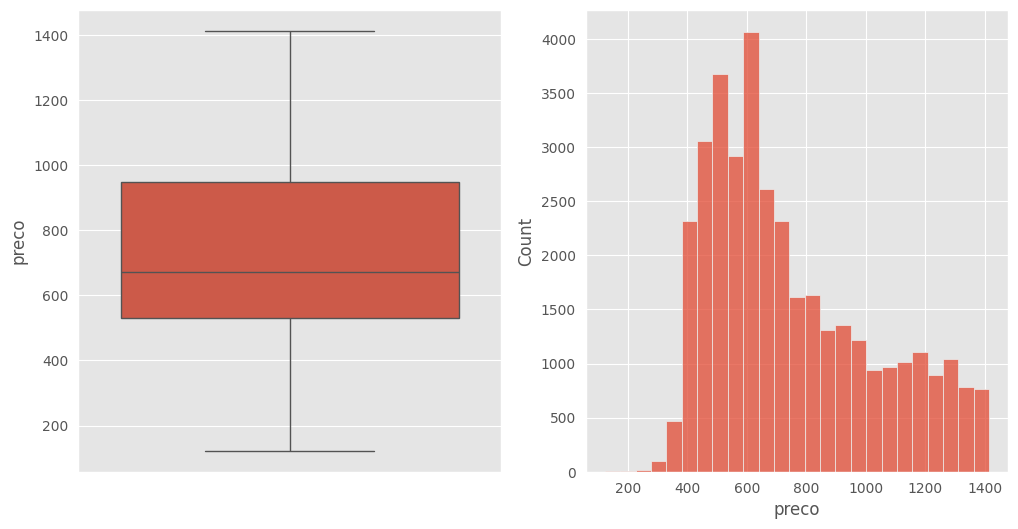

In [105]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_precoiqr['preco'])

plt.subplot(1,2,2)
sns.histplot(df_precoiqr['preco'], bins=25)

In [104]:
#Apply log on price
df_precoiqr['preco'] = np.sqrt(df_precoiqr['preco'])

/tmp/ipykernel_12183/2413000008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precoiqr['preco'] = np.sqrt(df_precoiqr['preco'])


## Area outlier

<Axes: xlabel='area', ylabel='Count'>

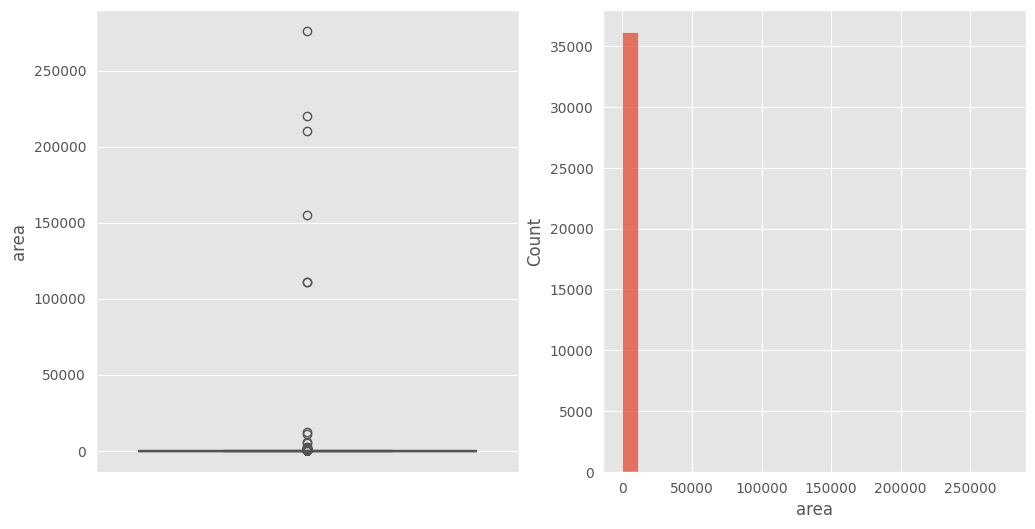

In [106]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_precoiqr['area'])

plt.subplot(1,2,2)
sns.histplot(df_precoiqr['area'], bins=25)

In [138]:
# Calculando o IQR para a coluna 'area'
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para outliers
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# Filtrando os dados para remover outliers
df_areaiqr = df_precoiqr[(df_precoiqr['area'] >= lower_bound) & (df_precoiqr['area'] <= upper_bound)]

## Pós remoção

<Axes: xlabel='area', ylabel='Count'>

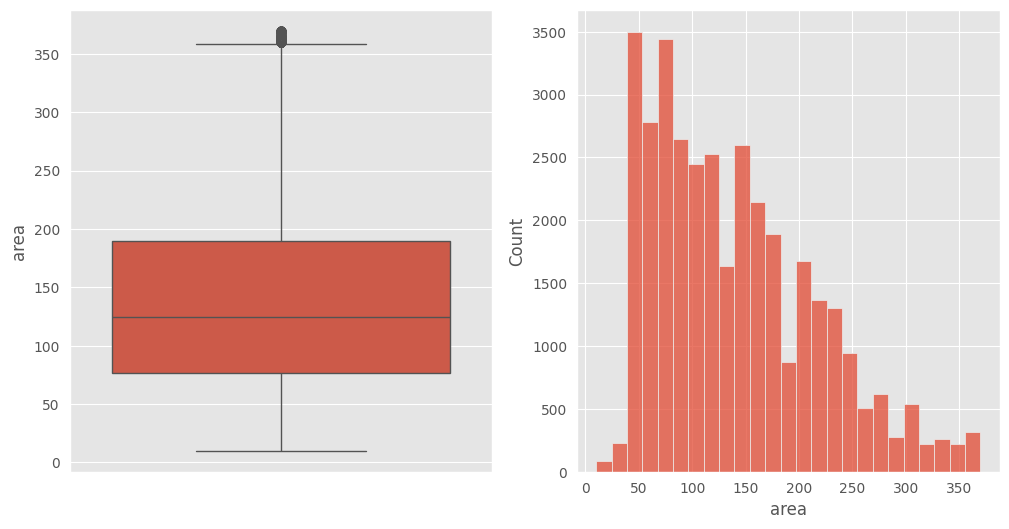

In [139]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_areaiqr['area'])

plt.subplot(1,2,2)
sns.histplot(df_areaiqr['area'], bins=25)

## Condominio outlier

<Axes: xlabel='condominio', ylabel='Count'>

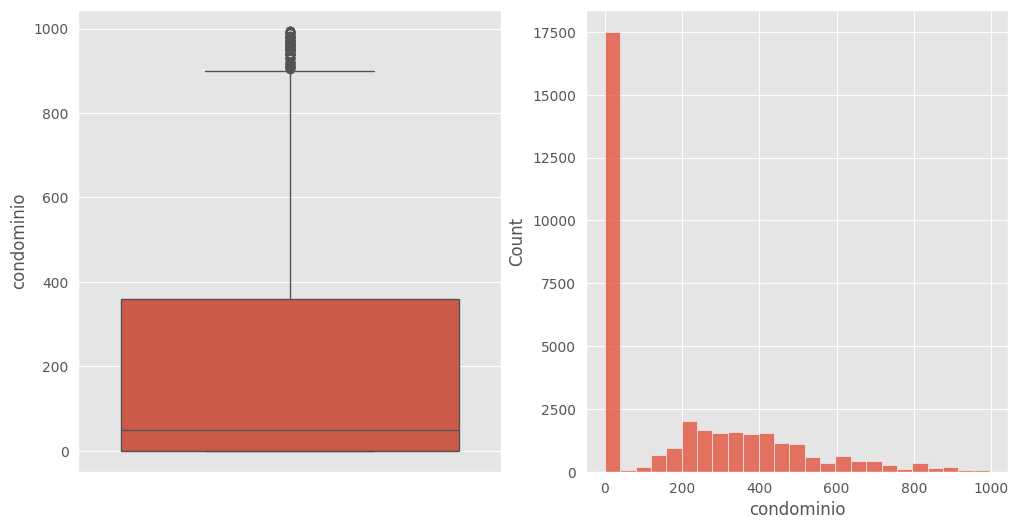

In [140]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_areaiqr['condominio'])

plt.subplot(1,2,2)
sns.histplot(df_areaiqr['condominio'], bins=25)

Lets try to fill 0 condos with some cases

In [153]:
df_areaiqr['condominio'] = df_areaiqr['condominio'].apply(lambda x: np.nan if x == 0 else x)

In [154]:
df_areaiqr.loc[:,['condominio','tipo','regiao']].groupby(['regiao','tipo']).mean().reset_index()

,regiao,tipo,condominio
0,BOSQUE,apartamento,257.55
1,BOSQUE,casa,299.74
2,CEU,apartamento,220.98
3,CEU,casa,117.00
4,Centro,apartamento,400.53
5,Centro,casa,387.18
6,Cidade das Crianças,apartamento,221.96
7,Cidade das Crianças,casa,343.78
8,HB,apartamento,383.31
9,HB,casa,455.06


In [155]:
# Criando o df_cleanedFrame condominio_medio
df_cleaned_condominio = {
    'regiao': ['BOSQUE', 'BOSQUE', 'CEU', 'CEU', 'Centro', 'Centro', 'Cidade das Crianças', 'Cidade das Crianças', 'HB', 'HB', 
               'Pinheirinho', 'Pinheirinho', 'Represa', 'Represa', 'Schimidt', 'Schimidt', 'Talhados', 'Talhados', 
               'Vila Toninho', 'Vila Toninho'],
    'tipo': ['apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 
             'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa'],
    'condominio': [257.55, 269.43, 220.98, 88.00, 391.81, 364.50, 221.59, 290.30, 377.90, 425.53, 218.75, 235.32, 240.38, 384.28, 
                   122.23, 372.88, 215.29, 323.93, 263.84, 374.02]
}

condominio_medio = pd.df_cleanedFrame(df_cleaned_condominio)

# Função para preencher valores NaN com base em tipo e região
def fill_condominio(row):
    if pd.isna(row['condominio']):
        return condominio_medio.loc[(condominio_medio['regiao'] == row['regiao']) & 
                                    (condominio_medio['tipo'] == row['tipo']), 'condominio'].values[0]
    else:
        return row['condominio']

In [156]:
#Fill na by region and by type
df_areaiqr['condominio'] = df_areaiqr.apply(fill_condominio, axis=1)


<Axes: xlabel='condominio', ylabel='Count'>

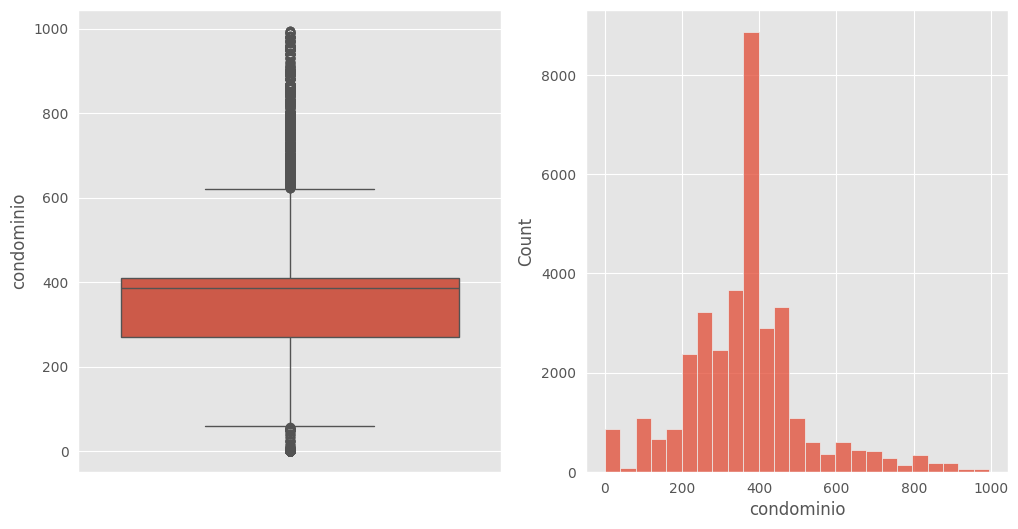

In [157]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_areaiqr['condominio'])

plt.subplot(1,2,2)
sns.histplot(df_areaiqr['condominio'], bins=25)

In [158]:
# Calculando o IQR para a coluna 'area'
Q1 = df['condominio'].quantile(0.25)
Q3 = df['condominio'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para outliers
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# Filtrando os dados para remover outliers
df_condoiqr = df_areaiqr[(df_areaiqr['condominio'] >= lower_bound) & (df_areaiqr['condominio'] <= upper_bound)]

<Axes: xlabel='condominio', ylabel='Count'>

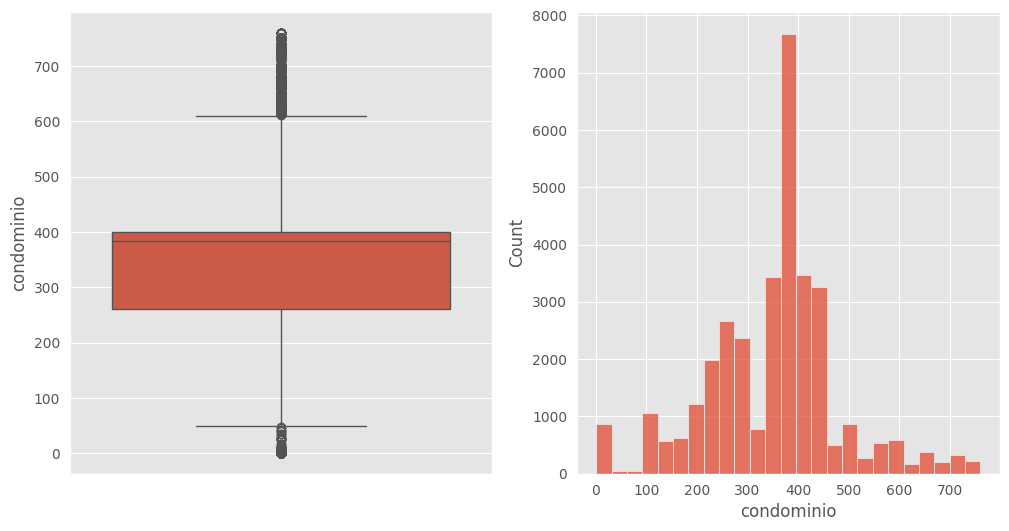

In [159]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_condoiqr['condominio'])

plt.subplot(1,2,2)
sns.histplot(df_condoiqr['condominio'], bins=25)

# EDA

In [168]:
df_corr = df_cleaned.drop(['link', 'nome','bairro','regiao'], axis=1)
df_corr['tipo'] = df_corr['tipo'].apply(lambda x: 0 if x == 'apartamento' else 1)

<Axes: >

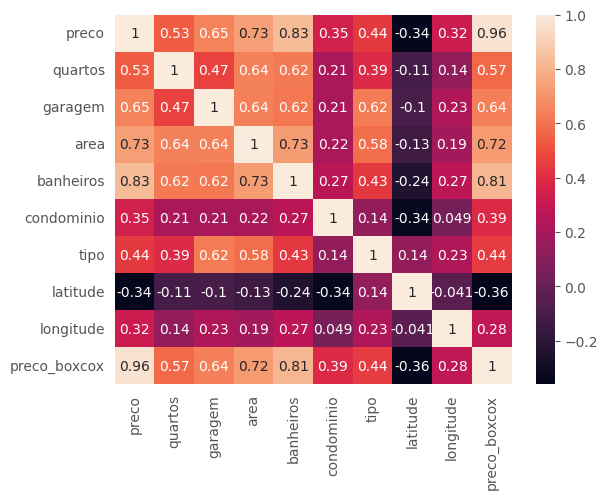

In [169]:
sns.heatmap(df_corr.corr(), annot=True)

In [160]:
df_cleaned = df_condoiqr.copy()

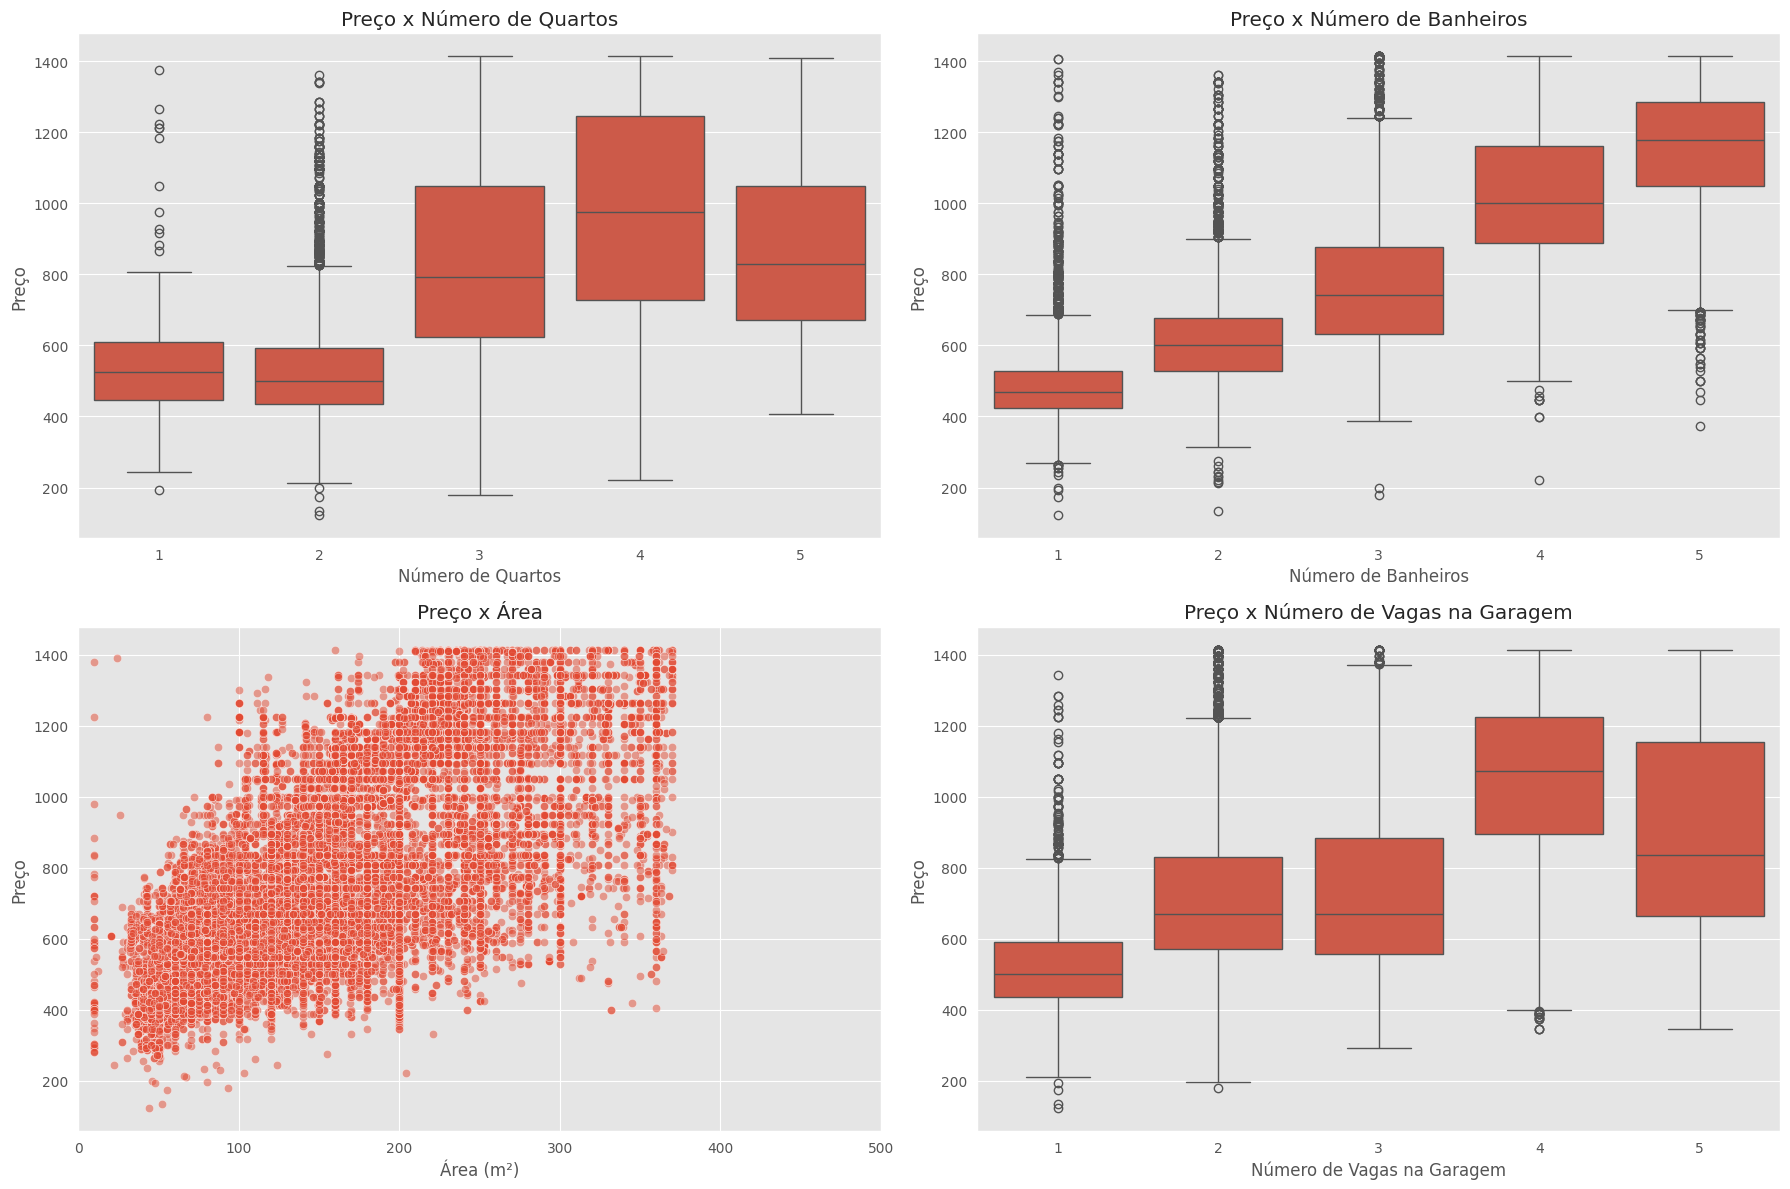

In [174]:
# Relação entre Preço e outras Variáveis

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Relação entre Preço e Número de Quartos
sns.boxplot(x=df_cleaned['quartos'], y=df_cleaned['preco'], ax=axs[0, 0])
axs[0, 0].set_title('Preço x Número de Quartos')
axs[0, 0].set_ylabel('Preço')
axs[0, 0].set_xlabel('Número de Quartos')

# Relação entre Preço e Número de Banheiros
sns.boxplot(x=df_cleaned['banheiros'], y=df_cleaned['preco'], ax=axs[0, 1])
axs[0, 1].set_title('Preço x Número de Banheiros')
axs[0, 1].set_ylabel('Preço')
axs[0, 1].set_xlabel('Número de Banheiros')

# Relação entre Preço e Área
sns.scatterplot(x=df_cleaned['area'], y=df_cleaned['preco'], ax=axs[1, 0], alpha=0.5)
axs[1, 0].set_title('Preço x Área')
axs[1, 0].set_ylabel('Preço')
axs[1, 0].set_xlabel('Área (m²)')
axs[1, 0].set_xlim(0, 500)  # Limitando a visualização da área para melhor visualização

# Relação entre Preço e Número de Vagas na Garagem
sns.boxplot(x=df_cleaned['garagem'], y=df_cleaned['preco'], ax=axs[1, 1])
axs[1, 1].set_title('Preço x Número de Vagas na Garagem')
axs[1, 1].set_ylabel('Preço')
axs[1, 1].set_xlabel('Número de Vagas na Garagem')

plt.tight_layout()
plt.show()

# Preprocess

In [175]:
df_cleaned.columns

Index(['nome', 'preco', 'quartos', 'garagem', 'area', 'banheiros',
       'condominio', 'link', 'tipo', 'bairro', 'latitude', 'longitude',
       'regiao', 'preco_boxcox'],
      dtype='object')

In [178]:
df_process = df_cleaned.drop(['latitude','longitude', 'link','nome'], axis=1).copy()

In [179]:
df_process.columns

Index(['preco', 'quartos', 'garagem', 'area', 'banheiros', 'condominio',
       'tipo', 'bairro', 'regiao'],
      dtype='object')

In [181]:
# Definindo as colunas que serão escalonadas
cols_to_scale = ['quartos', 'garagem', 'area', 'banheiros', 'condominio']

# Inicializando o escalonador
scaler = StandardScaler()

# Escalonando as colunas
df_process[cols_to_scale] = scaler.fit_transform(df_process[cols_to_scale])

# Verificando as primeiras linhas do df_cleanedset após o escalonamento
df_process[cols_to_scale].head()

# Codificando a variável 'regiao' usando one-hot encoding
df_process = pd.get_dummies(df_process, columns=['regiao'])
df_process = pd.get_dummies(df_process, columns=['tipo'])


# Criando uma codificação de frequência para a coluna 'bairro'
bairro_freq = df_process['bairro'].value_counts(normalize=True)
df_process['bairro'] = df_process['bairro'].map(bairro_freq)



In [182]:
df_process.head()

,preco,quartos,garagem,area,banheiros,condominio,bairro,regiao_BOSQUE,regiao_CEU,regiao_Centro,regiao_Cidade das Crianças,regiao_HB,regiao_Pinheirinho,regiao_Represa,regiao_Schimidt,regiao_Talhados,regiao_Vila Toninho,tipo_apartamento,tipo_casa
0,424.26,-1.02,-1.07,-1.17,-1.21,-1.11,0.04,False,False,True,False,False,False,False,False,False,False,True,False
1,387.30,-1.02,-1.07,-1.09,-1.21,-1.00,0.01,False,False,False,True,False,False,False,False,False,False,True,False
2,374.17,-1.02,-1.07,-1.15,-0.45,-0.99,0.00,False,True,False,False,False,False,False,False,False,False,True,False
3,412.31,-1.02,-1.07,-1.20,-1.21,-0.85,0.02,False,False,False,False,False,False,True,False,False,False,True,False
4,357.77,-1.02,-1.07,-1.04,-1.21,-0.99,0.01,False,False,False,True,False,False,False,False,False,False,True,False


# Machine Learning

In [184]:
X = df_process.drop(['preco'], axis=1)
y = df_process['preco']

In [185]:
X.head()

,quartos,garagem,area,banheiros,condominio,bairro,regiao_BOSQUE,regiao_CEU,regiao_Centro,regiao_Cidade das Crianças,regiao_HB,regiao_Pinheirinho,regiao_Represa,regiao_Schimidt,regiao_Talhados,regiao_Vila Toninho,tipo_apartamento,tipo_casa
0,-1.02,-1.07,-1.17,-1.21,-1.11,0.04,False,False,True,False,False,False,False,False,False,False,True,False
1,-1.02,-1.07,-1.09,-1.21,-1.00,0.01,False,False,False,True,False,False,False,False,False,False,True,False
2,-1.02,-1.07,-1.15,-0.45,-0.99,0.00,False,True,False,False,False,False,False,False,False,False,True,False
3,-1.02,-1.07,-1.20,-1.21,-0.85,0.02,False,False,False,False,False,False,True,False,False,False,True,False
4,-1.02,-1.07,-1.04,-1.21,-0.99,0.01,False,False,False,True,False,False,False,False,False,False,True,False


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
X_train.shape, X_test.shape

((27318, 18), (6830, 18))

In [188]:
from sklearn.ensemble import RandomForestRegressor

# Inicializando o modelo de Floresta Aleatória
random_forest_model = RandomForestRegressor(random_state=42, n_jobs=-1)

random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [189]:
y_pred_best = random_forest_model.predict(X_test)

# Calculando métricas de avaliação
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

mse_best, rmse_best, mae_best, r2_best

(6160.181438435957, 78.48682334274943, 48.98367544843745, 0.9193464656329053)

## Cross Validation

In [192]:
from sklearn.model_selection import cross_val_score

In [196]:
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [197]:
mean_score = -scores.mean()
std_score = scores.std()

In [198]:
print(mean_score)
print(std_score)


50.98032317439462
0.3923218171785649


In [190]:
!pip install optuna

  Using cached optuna-3.3.0-py3-none-any.whl (404 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.8 MB/s eta 0:00:0000:0100:01
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached cmaes-0.10.0-py3-none-any.whl (29 kB)
  Using cached alembic-1.12.0-py3-none-any.whl (226 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.9/612.9 kB 35.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


# Optune Fine Tunning

In [201]:
import optuna

/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [226]:
old_params = random_forest_model.get_params()

In [227]:
old_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [235]:
def refined_objective(trial):
    # Definindo um espaço de pesquisa centrado nos parâmetros fornecidos
    n_estimators = trial.suggest_int('n_estimators', 100, 150)
    criterion = 'squared_error'  # fixo baseado no que foi fornecido anteriormente
    max_depth = trial.suggest_int('max_depth', 30, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)
    max_features = trial.suggest_float('max_features', 0.7, 0.8)
    bootstrap = True  # fixo baseado no que foi fornecido anteriormente
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.03, 0.05)

    # Criando o modelo com os hiperparâmetros sugeridos
    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        ccp_alpha=ccp_alpha,
        random_state=42  # fixando a semente para reprodutibilidade
    )

# Treinando o modelo
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    return mean_squared_error(y_test, predictions, squared=False)

In [243]:
study = optuna.create_study(direction='minimize')  # Minimize MAE
study.optimize(refined_objective, n_trials=100, show_progress_bar=True)  # n_trials define quantas iterações de otimização você deseja

best_params = study.best_params

[I 2023-10-08 18:27:23,040] A new study created in memory with name: no-name-aa8f5b8f-394f-42a5-873c-645006dee920
Best trial: 0. Best value: 78.8871:   1%|▍                                              | 1/100 [00:10<18:04, 10.95s/it]

[I 2023-10-08 18:27:33,993] Trial 0 finished with value: 78.887125922805 and parameters: {'n_estimators': 108, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7299845129909278, 'ccp_alpha': 0.049081008909931834}. Best is trial 0 with value: 78.887125922805.


Best trial: 1. Best value: 77.4927:   2%|▉                                              | 2/100 [00:28<24:01, 14.71s/it]

[I 2023-10-08 18:27:51,326] Trial 1 finished with value: 77.49268473842213 and parameters: {'n_estimators': 110, 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7398067601687616, 'ccp_alpha': 0.048744796828241115}. Best is trial 1 with value: 77.49268473842213.


Best trial: 2. Best value: 76.8719:   3%|█▎                                           | 3/100 [01:37<1:04:02, 39.61s/it]

[I 2023-10-08 18:29:00,571] Trial 2 finished with value: 76.87186409827541 and parameters: {'n_estimators': 148, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7060651000422167, 'ccp_alpha': 0.04522154819203346}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   4%|█▉                                             | 4/100 [01:43<42:06, 26.32s/it]

[I 2023-10-08 18:29:06,516] Trial 3 finished with value: 80.62539564419231 and parameters: {'n_estimators': 118, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.7566864864881274, 'ccp_alpha': 0.036841795238742564}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   5%|██▎                                            | 5/100 [01:52<31:49, 20.10s/it]

[I 2023-10-08 18:29:15,590] Trial 4 finished with value: 78.8789482263128 and parameters: {'n_estimators': 124, 'max_depth': 38, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.7598936476826862, 'ccp_alpha': 0.03455698599521544}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   6%|██▊                                            | 6/100 [02:03<26:40, 17.03s/it]

[I 2023-10-08 18:29:26,650] Trial 5 finished with value: 79.04299060198267 and parameters: {'n_estimators': 106, 'max_depth': 38, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.7927950471927092, 'ccp_alpha': 0.04338314078359681}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   7%|███▎                                           | 7/100 [02:09<20:46, 13.40s/it]

[I 2023-10-08 18:29:32,586] Trial 6 finished with value: 80.69135368363614 and parameters: {'n_estimators': 119, 'max_depth': 37, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.711587413370399, 'ccp_alpha': 0.0442486320532737}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   8%|███▊                                           | 8/100 [02:20<19:15, 12.56s/it]

[I 2023-10-08 18:29:43,341] Trial 7 finished with value: 78.83664553941941 and parameters: {'n_estimators': 117, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7516355065567829, 'ccp_alpha': 0.03576947719785682}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   9%|████▏                                          | 9/100 [02:29<17:34, 11.59s/it]

[I 2023-10-08 18:29:52,788] Trial 8 finished with value: 78.8629346244629 and parameters: {'n_estimators': 107, 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7713969693111187, 'ccp_alpha': 0.03059709253314549}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:  10%|████▌                                         | 10/100 [03:06<29:03, 19.38s/it]

[I 2023-10-08 18:30:29,610] Trial 9 finished with value: 77.41045164509659 and parameters: {'n_estimators': 138, 'max_depth': 48, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7908689529510707, 'ccp_alpha': 0.03812232029689863}. Best is trial 2 with value: 76.87186409827541.


Best trial: 10. Best value: 76.8063:  11%|████▉                                        | 11/100 [04:15<51:05, 34.45s/it]

[I 2023-10-08 18:31:38,228] Trial 10 finished with value: 76.80629257245558 and parameters: {'n_estimators': 149, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7014510882273691, 'ccp_alpha': 0.04195496233719683}. Best is trial 10 with value: 76.80629257245558.


Best trial: 10. Best value: 76.8063:  12%|█████▏                                     | 12/100 [05:23<1:05:30, 44.67s/it]

[I 2023-10-08 18:32:46,274] Trial 11 finished with value: 76.89303198456237 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7007799299164187, 'ccp_alpha': 0.04178004502128221}. Best is trial 10 with value: 76.80629257245558.


Best trial: 12. Best value: 76.7521:  13%|█████▌                                     | 13/100 [06:32<1:15:47, 52.27s/it]

[I 2023-10-08 18:33:56,031] Trial 12 finished with value: 76.75209126359243 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7174848303286274, 'ccp_alpha': 0.04521864127200897}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  14%|██████                                     | 14/100 [07:36<1:19:54, 55.75s/it]

[I 2023-10-08 18:34:59,812] Trial 13 finished with value: 77.0446142094711 and parameters: {'n_estimators': 137, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.722261024775545, 'ccp_alpha': 0.04057711669124282}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  15%|██████▍                                    | 15/100 [08:13<1:10:51, 50.02s/it]

[I 2023-10-08 18:35:36,552] Trial 14 finished with value: 77.008767427435 and parameters: {'n_estimators': 140, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.720375438176562, 'ccp_alpha': 0.04615452597454926}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  16%|██████▉                                    | 16/100 [09:18<1:16:21, 54.54s/it]

[I 2023-10-08 18:36:41,586] Trial 15 finished with value: 76.8161495137456 and parameters: {'n_estimators': 143, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7147276403942802, 'ccp_alpha': 0.041518065231290834}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  17%|███████▎                                   | 17/100 [09:39<1:01:16, 44.30s/it]

[I 2023-10-08 18:37:02,082] Trial 16 finished with value: 77.42049270668304 and parameters: {'n_estimators': 131, 'max_depth': 43, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7002598950779654, 'ccp_alpha': 0.04628693471383252}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  18%|████████                                     | 18/100 [09:45<45:08, 33.03s/it]

[I 2023-10-08 18:37:08,858] Trial 17 finished with value: 80.65215189683222 and parameters: {'n_estimators': 133, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.7307170129407135, 'ccp_alpha': 0.03925799503714684}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  19%|████████▌                                    | 19/100 [10:54<59:00, 43.71s/it]

[I 2023-10-08 18:38:17,455] Trial 18 finished with value: 76.86733021187922 and parameters: {'n_estimators': 146, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7113911266819243, 'ccp_alpha': 0.04317190142440546}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  20%|█████████                                    | 20/100 [11:07<46:02, 34.54s/it]

[I 2023-10-08 18:38:30,617] Trial 19 finished with value: 78.87113875412899 and parameters: {'n_estimators': 130, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7421159500271282, 'ccp_alpha': 0.04727127323889806}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  21%|█████████▍                                   | 21/100 [11:53<50:09, 38.10s/it]

[I 2023-10-08 18:39:17,024] Trial 20 finished with value: 76.87974736589901 and parameters: {'n_estimators': 101, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7220492678291072, 'ccp_alpha': 0.04393216783299732}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  22%|█████████▉                                   | 22/100 [12:58<59:56, 46.11s/it]

[I 2023-10-08 18:40:21,809] Trial 21 finished with value: 76.81601850588528 and parameters: {'n_estimators': 143, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7129441418459714, 'ccp_alpha': 0.04153616859078108}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  23%|█████████▉                                 | 23/100 [14:04<1:06:49, 52.07s/it]

[I 2023-10-08 18:41:27,768] Trial 22 finished with value: 76.85288063781229 and parameters: {'n_estimators': 144, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7083068607186824, 'ccp_alpha': 0.04189758862850957}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  24%|██████████▎                                | 24/100 [15:11<1:11:31, 56.46s/it]

[I 2023-10-08 18:42:34,485] Trial 23 finished with value: 76.75548791496706 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7013127285128615, 'ccp_alpha': 0.03945949521282739}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  25%|██████████▊                                | 25/100 [15:48<1:03:15, 50.60s/it]

[I 2023-10-08 18:43:11,416] Trial 24 finished with value: 77.00633096159511 and parameters: {'n_estimators': 150, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7020915402830203, 'ccp_alpha': 0.03945396494736063}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  26%|███████████▋                                 | 26/100 [16:01<48:36, 39.42s/it]

[I 2023-10-08 18:43:24,745] Trial 25 finished with value: 78.57152619784156 and parameters: {'n_estimators': 146, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7071344616509347, 'ccp_alpha': 0.039986860668669674}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  27%|████████████▏                                | 27/100 [16:36<46:15, 38.02s/it]

[I 2023-10-08 18:43:59,512] Trial 26 finished with value: 76.75611582128597 and parameters: {'n_estimators': 135, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7178257540725331, 'ccp_alpha': 0.04511961100495555}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  28%|████████████▌                                | 28/100 [16:57<39:35, 33.00s/it]

[I 2023-10-08 18:44:20,777] Trial 27 finished with value: 77.38737731298129 and parameters: {'n_estimators': 135, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7172023604299511, 'ccp_alpha': 0.0499842012815637}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  29%|█████████████                                | 29/100 [17:10<31:50, 26.91s/it]

[I 2023-10-08 18:44:33,477] Trial 28 finished with value: 78.80650071264633 and parameters: {'n_estimators': 125, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7277854805296152, 'ccp_alpha': 0.04726989110195572}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  30%|█████████████▌                               | 30/100 [17:24<26:44, 22.92s/it]

[I 2023-10-08 18:44:47,107] Trial 29 finished with value: 78.82623577870744 and parameters: {'n_estimators': 138, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7310373528034393, 'ccp_alpha': 0.04491007855394825}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  31%|█████████████▉                               | 31/100 [17:44<25:29, 22.17s/it]

[I 2023-10-08 18:45:07,529] Trial 30 finished with value: 77.15259836116834 and parameters: {'n_estimators': 141, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7178542271778956, 'ccp_alpha': 0.04331997215334086}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  32%|██████████████▍                              | 32/100 [18:53<40:57, 36.15s/it]

[I 2023-10-08 18:46:16,280] Trial 31 finished with value: 76.75486941132951 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7062844787836643, 'ccp_alpha': 0.04228972053814184}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  33%|██████████████▊                              | 33/100 [20:02<51:31, 46.14s/it]

[I 2023-10-08 18:47:25,732] Trial 32 finished with value: 76.78959619081056 and parameters: {'n_estimators': 146, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7079113472498544, 'ccp_alpha': 0.04831288788990846}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  34%|███████████████▎                             | 34/100 [20:36<46:45, 42.50s/it]

[I 2023-10-08 18:47:59,745] Trial 33 finished with value: 76.9217130379961 and parameters: {'n_estimators': 128, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.725416958924333, 'ccp_alpha': 0.045133540281962925}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  35%|███████████████▋                             | 35/100 [21:45<54:25, 50.24s/it]

[I 2023-10-08 18:49:08,047] Trial 34 finished with value: 76.7845883478045 and parameters: {'n_estimators': 147, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7134498855569498, 'ccp_alpha': 0.045965942583594446}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  36%|████████████████▏                            | 36/100 [22:49<58:09, 54.53s/it]

[I 2023-10-08 18:50:12,579] Trial 35 finished with value: 76.88898308951624 and parameters: {'n_estimators': 141, 'max_depth': 36, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.705890748415653, 'ccp_alpha': 0.04269154840604849}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  37%|████████████████▋                            | 37/100 [23:29<52:39, 50.15s/it]

[I 2023-10-08 18:50:52,523] Trial 36 finished with value: 76.94493851880448 and parameters: {'n_estimators': 150, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7378776183466572, 'ccp_alpha': 0.044076176819140035}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  38%|█████████████████                            | 38/100 [23:39<39:23, 38.12s/it]

[I 2023-10-08 18:51:02,557] Trial 37 finished with value: 78.61689325035339 and parameters: {'n_estimators': 144, 'max_depth': 32, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.7177975525717698, 'ccp_alpha': 0.04280386044223972}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  39%|█████████████████▌                           | 39/100 [23:45<28:58, 28.49s/it]

[I 2023-10-08 18:51:08,593] Trial 38 finished with value: 80.6482327599656 and parameters: {'n_estimators': 122, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 0.7063203733169078, 'ccp_alpha': 0.04459351003491905}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  40%|██████████████████                           | 40/100 [24:15<28:47, 28.79s/it]

[I 2023-10-08 18:51:38,085] Trial 39 finished with value: 76.9258250367877 and parameters: {'n_estimators': 113, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7246569555416332, 'ccp_alpha': 0.040634757476910054}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  41%|██████████████████▍                          | 41/100 [25:14<37:26, 38.08s/it]

[I 2023-10-08 18:52:37,839] Trial 40 finished with value: 76.95201317108895 and parameters: {'n_estimators': 135, 'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7124503282913872, 'ccp_alpha': 0.038651865977578866}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  42%|██████████████████▉                          | 42/100 [26:22<45:25, 46.99s/it]

[I 2023-10-08 18:53:45,619] Trial 41 finished with value: 76.78447747833314 and parameters: {'n_estimators': 147, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7139289011275589, 'ccp_alpha': 0.045921677595489895}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  43%|███████████████████▎                         | 43/100 [27:29<50:17, 52.94s/it]

[I 2023-10-08 18:54:52,436] Trial 42 finished with value: 76.83077624360874 and parameters: {'n_estimators': 146, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7171131972588475, 'ccp_alpha': 0.045898254776786884}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  44%|███████████████████▊                         | 44/100 [28:36<53:22, 57.18s/it]

[I 2023-10-08 18:55:59,526] Trial 43 finished with value: 76.82087460826544 and parameters: {'n_estimators': 148, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.70933755638427, 'ccp_alpha': 0.04394908408815182}. Best is trial 12 with value: 76.75209126359243.


Best trial: 44. Best value: 76.7517:  45%|████████████████████▎                        | 45/100 [29:44<55:29, 60.54s/it]

[I 2023-10-08 18:57:07,887] Trial 44 finished with value: 76.75173795312904 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7036269460085399, 'ccp_alpha': 0.0450613565153746}. Best is trial 44 with value: 76.75173795312904.


Best trial: 45. Best value: 76.7507:  46%|████████████████████▋                        | 46/100 [30:53<56:44, 63.05s/it]

[I 2023-10-08 18:58:16,803] Trial 45 finished with value: 76.7506679172106 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7029116072279078, 'ccp_alpha': 0.044851722170112455}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  47%|█████████████████████▏                       | 47/100 [32:01<56:54, 64.43s/it]

[I 2023-10-08 18:59:24,454] Trial 46 finished with value: 76.7551445495486 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7047608661441445, 'ccp_alpha': 0.042505390691936755}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  48%|█████████████████████▌                       | 48/100 [32:14<42:26, 48.97s/it]

[I 2023-10-08 18:59:37,360] Trial 47 finished with value: 78.5994898727663 and parameters: {'n_estimators': 144, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7047613757821737, 'ccp_alpha': 0.04240275297627642}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  49%|██████████████████████                       | 49/100 [33:21<46:16, 54.45s/it]

[I 2023-10-08 19:00:44,575] Trial 48 finished with value: 76.9540740105206 and parameters: {'n_estimators': 148, 'max_depth': 46, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.704704068243475, 'ccp_alpha': 0.043826133296682515}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  50%|██████████████████████▌                      | 50/100 [34:25<47:40, 57.22s/it]

[I 2023-10-08 19:01:48,265] Trial 49 finished with value: 76.84456091097154 and parameters: {'n_estimators': 140, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7105749141974019, 'ccp_alpha': 0.04453072921272362}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  51%|██████████████████████▉                      | 51/100 [35:29<48:22, 59.24s/it]

[I 2023-10-08 19:02:52,223] Trial 50 finished with value: 76.81237632262153 and parameters: {'n_estimators': 142, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7002713173205752, 'ccp_alpha': 0.04312368366247652}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  52%|███████████████████████▍                     | 52/100 [36:35<49:09, 61.45s/it]

[I 2023-10-08 19:03:58,816] Trial 51 finished with value: 76.7547543685008 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7024791618806114, 'ccp_alpha': 0.04072661971981785}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  53%|███████████████████████▊                     | 53/100 [37:45<50:07, 63.99s/it]

[I 2023-10-08 19:05:08,752] Trial 52 finished with value: 76.75444222704374 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.70437274878369, 'ccp_alpha': 0.0427936660297938}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  54%|████████████████████████▎                    | 54/100 [38:52<49:42, 64.84s/it]

[I 2023-10-08 19:06:15,568] Trial 53 finished with value: 76.8947749523595 and parameters: {'n_estimators': 148, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7091815504167731, 'ccp_alpha': 0.041140010438829776}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  55%|████████████████████████▊                    | 55/100 [39:57<48:35, 64.80s/it]

[I 2023-10-08 19:07:20,258] Trial 54 finished with value: 76.79532985985817 and parameters: {'n_estimators': 145, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7036856375083264, 'ccp_alpha': 0.04098573837488478}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  56%|█████████████████████████▏                   | 56/100 [41:03<47:50, 65.23s/it]

[I 2023-10-08 19:08:26,515] Trial 55 finished with value: 76.82502912080713 and parameters: {'n_estimators': 148, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7001866207765827, 'ccp_alpha': 0.041762464637172786}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  57%|█████████████████████████▋                   | 57/100 [42:11<47:18, 66.01s/it]

[I 2023-10-08 19:09:34,340] Trial 56 finished with value: 76.85384192946852 and parameters: {'n_estimators': 150, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7107076145281884, 'ccp_alpha': 0.04326906729936149}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  58%|██████████████████████████                   | 58/100 [43:16<46:03, 65.79s/it]

[I 2023-10-08 19:10:39,621] Trial 57 finished with value: 76.84882188388175 and parameters: {'n_estimators': 145, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7051340268189272, 'ccp_alpha': 0.042224383733322664}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  59%|██████████████████████████▌                  | 59/100 [43:29<34:04, 49.86s/it]

[I 2023-10-08 19:10:52,323] Trial 58 finished with value: 78.54415087351977 and parameters: {'n_estimators': 139, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7090434881186494, 'ccp_alpha': 0.04533482186374434}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  60%|███████████████████████████                  | 60/100 [43:49<27:13, 40.85s/it]

[I 2023-10-08 19:11:12,134] Trial 59 finished with value: 77.19577864182946 and parameters: {'n_estimators': 142, 'max_depth': 34, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7151681375533677, 'ccp_alpha': 0.04020130636579968}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  61%|███████████████████████████▍                 | 61/100 [43:56<20:06, 30.94s/it]

[I 2023-10-08 19:11:19,953] Trial 60 finished with value: 80.57516831163957 and parameters: {'n_estimators': 148, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 0.7030347186235153, 'ccp_alpha': 0.043764896741698533}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  62%|███████████████████████████▉                 | 62/100 [45:04<26:30, 41.86s/it]

[I 2023-10-08 19:12:27,276] Trial 61 finished with value: 76.75488792161016 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.704777664596976, 'ccp_alpha': 0.0424469675094423}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  63%|████████████████████████████▎                | 63/100 [46:13<30:49, 49.99s/it]

[I 2023-10-08 19:13:36,248] Trial 62 finished with value: 76.75486735903523 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7030613400338169, 'ccp_alpha': 0.0416961704891347}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  64%|████████████████████████████▊                | 64/100 [47:21<33:19, 55.54s/it]

[I 2023-10-08 19:14:44,728] Trial 63 finished with value: 76.78484607204602 and parameters: {'n_estimators': 147, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7008160889269428, 'ccp_alpha': 0.04449990760708893}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  64%|████████████████████████████▊                | 64/100 [47:23<26:39, 44.42s/it]


[W 2023-10-08 19:14:46,162] Trial 64 failed with parameters: {'n_estimators': 145, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.707361867355648, 'ccp_alpha': 0.04167384537883271} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_12183/1386968786.py", line 26, in refined_objective
    model.fit(X_train, y_train)
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 456, in fit
    trees = Parallel(
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/l

KeyboardInterrupt: 

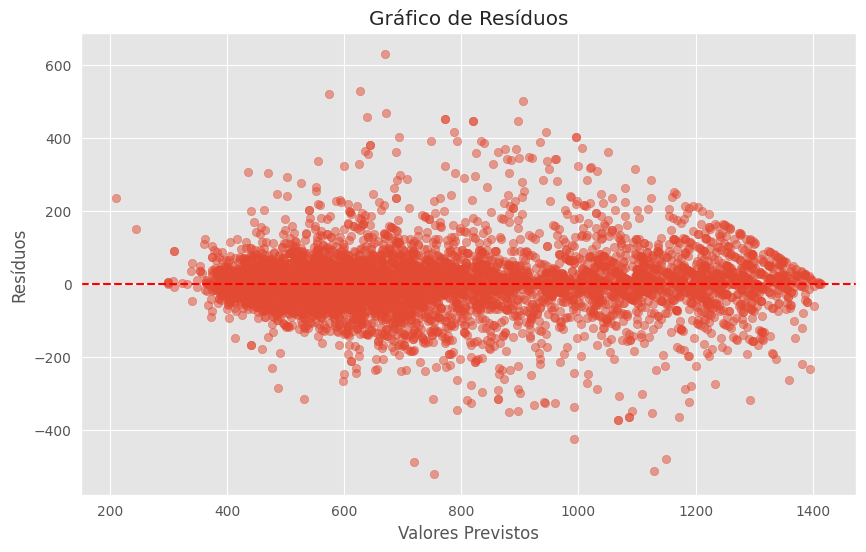

In [241]:
import matplotlib.pyplot as plt

# Usando o modelo para fazer previsões no conjunto de validação
predicted_values = random_forest_model.predict(X_test)

# Calculando os resíduos
residuals = y_test - predicted_values

# Plotando o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Linha horizontal
plt.title("Gráfico de Resíduos")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

# FInal Model

In [248]:
best_params = {
'n_estimators': 150, 
'max_depth': 33, 
'min_samples_split': 2, 
'min_samples_leaf': 1, 
'max_features': 0.7036269460085399, 
'ccp_alpha': 0.0450613565153746,
'criterion' : 'squared_error',
'bootstrap' : True,
'random_state':42,
'n_jobs':-1}

best_model = RandomForestRegressor(**best_params)

best_model.fit(X_train, y_train)

y_best = best_model.predict(X_test)

In [249]:
# Calculando métricas de avaliação
mse_best = mean_squared_error(y_test, y_best)
rmse_best = mean_squared_error(y_test, y_best, squared=False)
mae_best = mean_absolute_error(y_test, y_best)
r2_best = r2_score(y_test, y_best)

mse_best, rmse_best, mae_best, r2_best

(5890.8292788257895, 76.75173795312905, 48.55859196022626, 0.9228730181994294)

In [252]:
rf_complete = RandomForestRegressor(**best_params)

rf_complete.fit(X, y)

RandomForestRegressor(ccp_alpha=0.0450613565153746, max_depth=33,
                      max_features=0.7036269460085399, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [251]:
best_model.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.0450613565153746, max_depth=33,
                      max_features=0.7036269460085399, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [253]:
import joblib

joblib.dump(rf_complete,'rf_model.joblib')

['rf_model.joblib']